In [1]:
import pandas as pd
import numpy as np
import math

df = pd.read_pickle('electronika_clean.pkl')
df

,Unnamed: 0,Order_ID,Email_new,Phone_new,Source,OrderDate,время,месяц,ChangeDate,DeliveryDate,...,Quant,RowPrice,RowDiscount,RowSum,Brand,TN,TK,NomFullPath,Week,Nom_ID
0,10,1303000511_TT,556669108109_lm16@gmail.com,55574953-52525755535375,Онлайн-Резерв.,2016-03-01,10:46:45.000,201603,2016-03-05 09:16:49.000,2016-03-01 00:00:00.000,...,1,2970,0,2970,Ника,Товары для дома,Хозтовары,Техника для дома/Техника для ухода за одеждой/...,9,90364
1,12,1303000512_TT,556669108109_lm16@gmail.com,55574953-52525755535375,Онлайн-Резерв.,2016-03-01,10:47:19.000,201603,2016-03-01 10:59:43.000,2016-03-01 00:00:00.000,...,1,19490,0,19490,DeLonghi,Мелкая бытовая техника,Приготовление пищи,Техника для кухни/Приготовление пищи/Мультиварки/,9,45673
2,14,1303000513_TT,666668112117_pu19@ya.ru,55575655-50555350534877,Онлайн-Резерв.,2016-03-11,16:06:56.000,201603,2016-03-11 20:11:18.000,2016-03-12 00:00:00.000,...,1,19990,0,19990,Samsung,ТВ-Аудио,Телевизоры LCD,"Телевизоры, аудио, видео/Телевизоры/LED телеви...",10,120757
3,16,1303000514_TT,666668112117_pu19@ya.ru,55575653-57485657505272,Онлайн-Резерв.,2016-03-15,18:13:33.000,201603,2016-03-15 18:17:35.000,2016-03-22 00:00:00.000,...,1,23680,0,23680,СМК,Мебель,Мягкая мебель,Мебель/Мягкая мебель/Диваны/Трехместные диваны/,11,264580
4,28,1303000520_TT,56666668112117_pu26@yanded.ru,55575449-54535553535073,Онлайн-Резерв.,2016-03-01,00:01:46.000,201603,2016-03-04 15:09:38.000,2016-03-02 00:00:00.000,...,1,2420,0,2420,HP,Аксессуары,Картриджи и бумага,"Компьютеры, ноутбуки, планшеты/Оргтехника/Расх...",9,76102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183067,357019,5898089_BX,6666449117_1u9@bk.ru,55574957-51495048515075,Онлайн-Резерв.,2016-04-30,23:51:37.000,201604,2016-05-03 12:55:07.000,2016-05-02 00:00:00.000,...,1,899,0,899,Saturn,Климат,Вентиляторы бытовые,Техника для дома/Климатическая техника/Кондици...,17,38755
183068,357021,5898095_BX,666661118109_vm27@yahoo.com,55575452-55554849505278,Онлайн-Резерв.,2016-04-30,23:54:03.000,201604,2016-05-04 19:43:40.000,2016-05-07 00:00:00.000,...,1,1090,0,1090,Case Logic,Аксессуары,Аксессуары для фото/видео,Фото- и видеотехника/Аксессуары для фото и вид...,17,31908
183069,357023,5898099_BX,3110116_nt16@pisem.net,55574948-50554849554878,Онлайн-Резерв.,2016-04-30,23:56:02.000,201604,2016-05-01 11:57:42.000,2016-05-08 00:00:00.000,...,1,6859,0,6859,ELIKOR,Крупная бытовая техника,Встраиваемая техника,Встраиваемая техника/Вытяжки/,17,140459
183070,357024,5898102_BX,55666665102117_fu13@list.ru,55575648-51484956545071,Онлайн-Резерв.,2016-04-30,23:56:38.000,201604,2016-05-06 20:18:49.000,2016-05-05 00:00:00.000,...,1,9120,0,9120,FORWARD,Спорт и активный отдых,Велосипеды и аксессуары,Товары для спорта и отдыха/Велосипеды и аксесс...,17,295956


In [ ]:
clustering_2 = pd.read_csv('clustering_results_2.csv')
df_clustering_2 = df.join(clustering_2[['Phone_new', 'cluster']].set_index('Phone_new'), on='Phone_new')
df_clustering_2['cluster'].value_counts()

cluster
8     106327
0      42030
13     16376
12      6342
6       3030
9       2918
2       2868
5        968
7        950
1        663
4        361
10       167
3         51
11        21
Name: count, dtype: int64

In [15]:
cluster = 8
total_sales = df_clustering_2[df_clustering_2['cluster'] == cluster][['OrderDate', 'Quant']].groupby('OrderDate').sum()
total_sales

,Quant
OrderDate,
2016-03-01,2074
2016-03-02,2368
2016-03-03,2445
2016-03-04,2066
2016-03-05,2652
...,...
2016-04-26,1879
2016-04-27,1808
2016-04-28,1576


In [16]:
categories = ['Крупная бытовая техника', 'Мелкая бытовая техника', 'Цифровая Техника']
sales = df_clustering_2[(df_clustering_2['cluster'] == cluster) & (df_clustering_2['TN'].isin(categories))][['OrderDate', 'TN', 'Quant']].groupby(['OrderDate', 'TN']).sum()
sales.reset_index(inplace=True)
sales = sales.join(total_sales, on='OrderDate', rsuffix='_total')
sales['Percent'] = 100.0 * sales['Quant'] / sales['Quant_total']
sales

,OrderDate,TN,Quant,Quant_total,Percent
0,2016-03-01,Крупная бытовая техника,93,2074,4.484089
1,2016-03-01,Мелкая бытовая техника,639,2074,30.810029
2,2016-03-01,Цифровая Техника,181,2074,8.727097
3,2016-03-02,Крупная бытовая техника,117,2368,4.940878
4,2016-03-02,Мелкая бытовая техника,660,2368,27.871622
...,...,...,...,...,...
178,2016-04-29,Мелкая бытовая техника,383,1627,23.540258
179,2016-04-29,Цифровая Техника,158,1627,9.711125
180,2016-04-30,Крупная бытовая техника,86,1419,6.060606
181,2016-04-30,Мелкая бытовая техника,303,1419,21.353066


Text(0.5, 1.0, 'Sales % clustering_2_cluster_8')

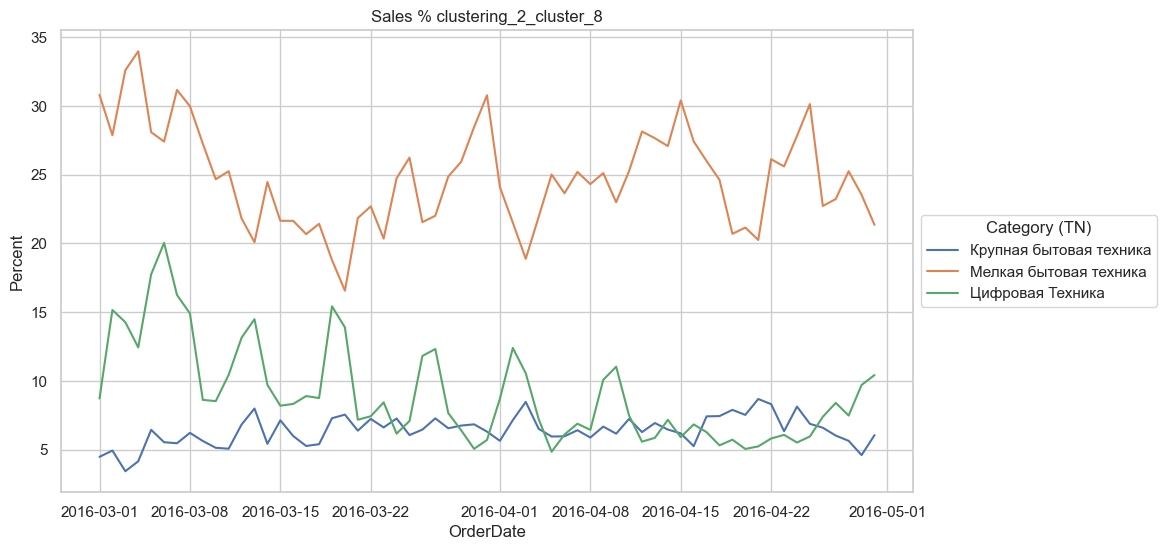

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.figure(figsize=(11, 6))
sns.lineplot(data=sales, x='OrderDate', y='Percent', hue='TN')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Category (TN)")
plt.title(f'Sales % clustering_2_cluster_{cluster}')

Text(0.5, 1.0, 'Sales % clustering_2_cluster_0')

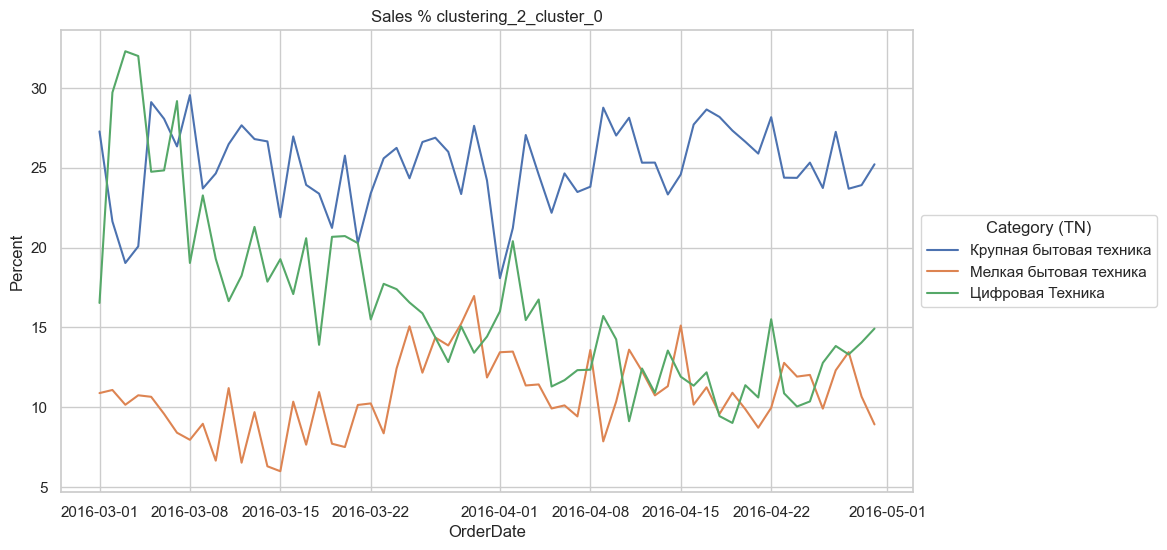

In [18]:
cluster = 0
total_sales = df_clustering_2[df_clustering_2['cluster'] == cluster][['OrderDate', 'Quant']].groupby('OrderDate').sum()
categories = ['Крупная бытовая техника', 'Мелкая бытовая техника', 'Цифровая Техника']
sales = df_clustering_2[(df_clustering_2['cluster'] == cluster) & (df_clustering_2['TN'].isin(categories))][['OrderDate', 'TN', 'Quant']].groupby(['OrderDate', 'TN']).sum()
sales.reset_index(inplace=True)
sales = sales.join(total_sales, on='OrderDate', rsuffix='_total')
sales['Percent'] = 100.0 * sales['Quant'] / sales['Quant_total']

sns.set(style="whitegrid")
plt.figure(figsize=(11, 6))
sns.lineplot(data=sales, x='OrderDate', y='Percent', hue='TN')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Category (TN)")
plt.title(f'Sales % clustering_2_cluster_{cluster}')

## Наличие акции

In [19]:
actions_values = df['Actions'].value_counts().index
actions_set = set()
for action in actions_values:
    values = action.split(',')
    for value in values:
        actions_set.add(value)

for col in list(actions_set):
    df[col] = df['Actions'].apply(lambda x: int(str(x).find(col) != -1))
df

,Unnamed: 0,Order_ID,Email_new,Phone_new,Source,OrderDate,время,месяц,ChangeDate,DeliveryDate,...,NomFullPath,Week,Nom_ID,БесплатнаяДоставкаНаСуммуКорзины,Подарки,СкидкаДляСпособаОплаты,СкидкаНаТоварПоПромоСлову,СкидкаНаКомплект,СкидкаСуммойПроцентомСЛимитом,НайдёшьДешевле
0,10,1303000511_TT,556669108109_lm16@gmail.com,55574953-52525755535375,Онлайн-Резерв.,2016-03-01,10:46:45.000,201603,2016-03-05 09:16:49.000,2016-03-01 00:00:00.000,...,Техника для дома/Техника для ухода за одеждой/...,9,90364,0,0,0,0,0,0,0
1,12,1303000512_TT,556669108109_lm16@gmail.com,55574953-52525755535375,Онлайн-Резерв.,2016-03-01,10:47:19.000,201603,2016-03-01 10:59:43.000,2016-03-01 00:00:00.000,...,Техника для кухни/Приготовление пищи/Мультиварки/,9,45673,0,0,0,0,0,0,0
2,14,1303000513_TT,666668112117_pu19@ya.ru,55575655-50555350534877,Онлайн-Резерв.,2016-03-11,16:06:56.000,201603,2016-03-11 20:11:18.000,2016-03-12 00:00:00.000,...,"Телевизоры, аудио, видео/Телевизоры/LED телеви...",10,120757,1,0,0,0,0,0,0
3,16,1303000514_TT,666668112117_pu19@ya.ru,55575653-57485657505272,Онлайн-Резерв.,2016-03-15,18:13:33.000,201603,2016-03-15 18:17:35.000,2016-03-22 00:00:00.000,...,Мебель/Мягкая мебель/Диваны/Трехместные диваны/,11,264580,1,0,0,0,0,0,0
4,28,1303000520_TT,56666668112117_pu26@yanded.ru,55575449-54535553535073,Онлайн-Резерв.,2016-03-01,00:01:46.000,201603,2016-03-04 15:09:38.000,2016-03-02 00:00:00.000,...,"Компьютеры, ноутбуки, планшеты/Оргтехника/Расх...",9,76102,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183067,357019,5898089_BX,6666449117_1u9@bk.ru,55574957-51495048515075,Онлайн-Резерв.,2016-04-30,23:51:37.000,201604,2016-05-03 12:55:07.000,2016-05-02 00:00:00.000,...,Техника для дома/Климатическая техника/Кондици...,17,38755,0,0,0,0,0,0,0
183068,357021,5898095_BX,666661118109_vm27@yahoo.com,55575452-55554849505278,Онлайн-Резерв.,2016-04-30,23:54:03.000,201604,2016-05-04 19:43:40.000,2016-05-07 00:00:00.000,...,Фото- и видеотехника/Аксессуары для фото и вид...,17,31908,0,0,0,0,0,0,0
183069,357023,5898099_BX,3110116_nt16@pisem.net,55574948-50554849554878,Онлайн-Резерв.,2016-04-30,23:56:02.000,201604,2016-05-01 11:57:42.000,2016-05-08 00:00:00.000,...,Встраиваемая техника/Вытяжки/,17,140459,1,0,0,0,0,0,0
183070,357024,5898102_BX,55666665102117_fu13@list.ru,55575648-51484956545071,Онлайн-Резерв.,2016-04-30,23:56:38.000,201604,2016-05-06 20:18:49.000,2016-05-05 00:00:00.000,...,Товары для спорта и отдыха/Велосипеды и аксесс...,17,295956,0,0,0,0,0,0,0
